In [1]:
import numpy as np
import pandas as pd
import time

import classes as c
import random as r
import matplotlib.pyplot as plt
from pulp import *

In [2]:
# load truck and load data
truckers = ['alf', 'anton', 'albert', 'bert', 'benno', 'benjamin', 'Carl', 'Dennis', 'Enno', 'Fabian', 'Gustav']
load_numbers = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']

trucks = [c.truck(name) for name in truckers]
loads = [c.load(id) for id in load_numbers]

# initialize truck positions
for truck in trucks:
    lat = r.randint(1, 101)
    lon = r.randint(1, 101)
    truck.set_position(lat, lon)

# initialize truck positions
for load in loads:
    lat = r.randint(1, 101)
    lon = r.randint(1, 101)
    load.set_position_load(lat, lon)
    lat = r.randint(101, 201)
    lon = r.randint(101, 201)
    load.set_position_unload(lat, lon)

# initialize dictionaries with names and objects
truck_dict = {truckers[i]:trucks[i] for i in range(len(truckers))}
load_dict = {load_numbers[i]:loads[i] for i in range(len(loads))}

In [3]:
# setup costs
costs = {(truckers[i], load_numbers[j]):trucks[i].distance_to(loads[j]) for i in range(len(trucks)) for j in range(len(loads))}

# setup decision variables
trucks_loads = [i for i in costs]

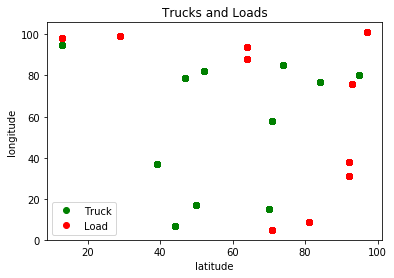

In [4]:
# print position of loads and trucks
for var in trucks_loads:
    x_coordinates = []
    y_coordinates = []
    x_coordinates.append(truck_dict[var[0]].position[0])
    y_coordinates.append(truck_dict[var[0]].position[1])
    x_coordinates.append(load_dict[var[1]].position_load[0])
    y_coordinates.append(load_dict[var[1]].position_load[1])
    plt.plot(x_coordinates[0], y_coordinates[0], 'go')
    plt.plot(x_coordinates[1], y_coordinates[1], 'ro')
plt.title('Trucks and Loads')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.legend(['Truck', 'Load'])
plt.show()

Setup Train (not implemented)
 1. set train station
 2. check how many slots are free on train
 3. heuristic -> assign all loads to train with distance < threshold
 4. go on without loads for train

## MILP

In [5]:
# save start time
start_time = time.time()
# setup milp
prob = LpProblem("Truck Assignment", LpMinimize)
# create decision variables
decision_vars = LpVariable.dicts('truck', trucks_loads, cat='Binary')
# create objective function
prob += lpSum([costs[i]*decision_vars[i] for i in trucks_loads]), "Total Cost of Trucks"

Setup constraints: 

1.) only one truck per load

In [6]:
if len(load_numbers) >= len(truckers):
    for truck in truckers:
        prob += lpSum([decision_vars[(truck, load)] for load in load_numbers]) == 1, 'max load per trucker '+ truck
    for load in load_numbers:
        prob += lpSum([decision_vars[(truck, load)] for truck in truckers]) <= 1, 'max trucks per load '+ load
else:
    for truck in truckers:
        prob += lpSum([decision_vars[(truck, load)] for load in load_numbers]) <= 1, 'max load per trucker '+ truck
    for load in load_numbers:
        prob += lpSum([decision_vars[(truck, load)] for truck in truckers]) == 1, 'max trucks per load '+ load    

2.) Truck has enough drivingtime left

(not implemented)

add constraint decision_var * drivingtime <= time needed

In [7]:
prob.solve()

1

In [8]:
# print runtime
print("Runtime: --- %s seconds ---" % (time.time() - start_time))

Runtime: --- 0.5312438011169434 seconds ---


In [9]:
print("Status:", LpStatus[prob.status])

Status: Optimal


In [11]:
assigned_trucks = []
idle_trucks = []

print('load assignment: ')
for var in trucks_loads:
    if decision_vars[var].varValue > 0:
        assigned_trucks.append(var[0])
        print(var)
for var in trucks_loads:
    if (var[0] not in assigned_trucks and var[0] not in idle_trucks):
        idle_trucks.append(var[0])
print("Total Cost of Trucks = ", value(prob.objective), '\n')
print('idle trucks: ', idle_trucks)

load assignment: 
('alf', 'A4')
('anton', 'A2')
('albert', 'A8')
('bert', 'A6')
('benjamin', 'A3')
('Carl', 'A10')
('Dennis', 'A9')
('Enno', 'A7')
('Fabian', 'A1')
('Gustav', 'A5')
Total Cost of Trucks =  199.803512323947 

idle trucks:  ['benno']


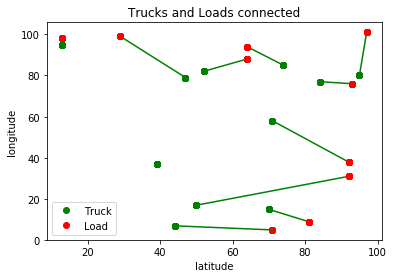

In [12]:
for var in trucks_loads:
    x_coordinates = []
    y_coordinates = []
    x_coordinates.append(truck_dict[var[0]].position[0])
    y_coordinates.append(truck_dict[var[0]].position[1])
    x_coordinates.append(load_dict[var[1]].position_load[0])
    y_coordinates.append(load_dict[var[1]].position_load[1])
    plt.plot(x_coordinates[0], y_coordinates[0], 'go')
    plt.plot(x_coordinates[1], y_coordinates[1], 'ro')
    if decision_vars[var].varValue > 0:
        plt.plot(x_coordinates, y_coordinates, '-g')
plt.title('Trucks and Loads connected')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.legend(['Truck', 'Load'])
plt.show()